#  Requêter via des API avec Python




<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=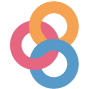)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)

# Introduction : Qu'est-ce qu'une API ?  

## Définition

Pour expliquer le principe d'une API, je vais reprendre le début de 
la fiche dédiée dans la documentation collaborative
[utilitR](https://www.book.utilitr.org/api.html) que je recommande de lire :

> Une *Application Programming Interface* (ou API) est une interface de programmation qui permet d’utiliser une application existante pour restituer des données. Le terme d’API peut être paraître intimidant, mais il s’agit simplement d’une façon de mettre à disposition des données : plutôt que de laisser l’utilisateur consulter directement des bases de données (souvent volumineuses et complexes), l’API lui propose de formuler une requête qui est traitée par le serveur hébergeant la base de données, puis de recevoir des données en réponse à sa requête.
> 
> D’un point de vue informatique, une API est une porte d’entrée clairement identifiée par laquelle un logiciel offre des services à d’autres logiciels (ou utilisateurs). L’objectif d’une API est de fournir un point d’accès à une fonctionnalité qui soit facile à utiliser et qui masque les détails de la mise en oeuvre. Par exemple, l’API Sirene permet de récupérer la raison sociale d’une entreprise à partir de son identifiant Siren en interrogeant le référentiel disponible sur Internet directement depuis un script R, sans avoir à connaître tous les détails du répertoire Sirene.
>
> À l’Insee comme ailleurs, la connexion entre les bases de données pour les nouveaux projets tend à se réaliser par des API. L’accès à des données par des API devient ainsi de plus en plus commun et est amené à devenir une compétence de base de tout utilisateur de données.
>
> [utilitR](https://www.book.utilitr.org/api.html)

## Avantages des API

A nouveau, citons la documentation [utilitR](https://www.book.utilitr.org/api.html)

Les API présentent de multiples avantages :

> * Les API rendent les programmes plus reproductibles. En effet, grâce aux API, il est possible de mettre à jour facilement les données utilisées par un programme si celles-ci évoluent. Cette flexibilité accrue pour l’utilisateur évite au producteur de données d’avoir à réaliser de multiples extractions, et réduit le problème de la coexistence de versions différentes des données.
> * Grâce aux API, l’utilisateur peut extraire facilement une petite partie d’une base de données plus conséquente.
> * Les API permettent de mettre à disposition des données tout en limitant le nombre de personnes ayant accès aux bases de données elles-mêmes.
> * Grâce aux API, il est possible de proposer des services sur mesure pour les utilisateurs (par exemple, un accès spécifique pour les gros utilisateurs).
>
> [utilitR](https://www.book.utilitr.org/api.html)

## Utilisation des API

Citons encore une fois
la documentation [utilitR](https://www.book.utilitr.org/api.html)

> Une API peut souvent être utilisée de deux façons : par une interface Web, et par l’intermédiaire d’un logiciel (R, Python…). Par ailleurs, les API peuvent être proposées avec un niveau de liberté variable pour l’utilisateur :
> 
> * soit en libre accès (l’utilisation n’est pas contrôlée et l’utilisateur peut utiliser le service comme bon lui semble) ;
> * soit via la génération d’un compte et d’un jeton d’accès qui permettent de sécuriser l’utilisation de l’API et de limiter le nombre de requêtes.
>
> [utilitR](https://www.book.utilitr.org/api.html)

De nombreuses API nécessitent une authentification, c'est-à-dire un 
compte utilisateur afin de pouvoir accéder aux données. 
Dans un premier temps, 
nous regarderons exclusivement les API ouvertes sans restriction d'accès.  
Certains exercices et exemples permettront néanmoins d'essayer des API
avec restrictions d'accès. 

# Requêter une API

## Principe général

> L’utilisation de l’interface Web est utile dans une démarche exploratoire mais trouve rapidement ses limites, notamment lorsqu’on consulte régulièrement l’API. L’utilisateur va rapidement se rendre compte qu’il est beaucoup plus commode d’utiliser une API via un logiciel de traitement pour automatiser la consultation ou pour réaliser du téléchargement de masse. De plus, l’interface Web n’existe pas systématiquement pour toutes les API.
> 
> Le mode principal de consultation d’une API consiste à adresser une requête à cette API via un logiciel adapté (R, Python, Java…). Comme pour l’utilisation d’une fonction, l’appel d’une API comprend des paramètres qui sont détaillées dans la documentation de l’API. 
>
> [utilitR](https://www.book.utilitr.org/api.html)

Voici les éléments importants à avoir en tête sur les requêtes (j'emprunte encore
à [`utilitR`](https://www.book.utilitr.org/api.html)):

* Le __point d’entrée__ d’un service offert par une API se présente sous la forme d’une URL (adresse web). Chaque service proposé par une API a sa propre URL. Par exemple, dans le cas de l’OpenFood Facts,
l'URL à utiliser pour obtenir des informations sur un produit particulier (l'identifiant `737628064502`) estg https://world.openfoodfacts.org/api/v0/product/737628064502.json
* Cette URL doit être complétée avec différents paramètres qui précisent la requête (par exemple l’identifiant Siren). Ces paramètres viennent s’ajouter à l’URL, souvent à la suite de `?`. Chaque service proposé par une API a ses propres paramètres, détaillés dans la documentation. 
* Lorsque l’utilisateur soumet sa requête, l’API lui renvoie une réponse structurée contenant l’ensemble des informations demandées. Le résultat envoyé par une API est majoritairement aux formats JSON ou XML (deux formats dans lesquels les informations sont hiérarchisées de manière emboitée). Plus rarement, certains services proposent une information sous forme plate (de type csv).
* Du fait de la dimension hiérarchique des formats JSON ou XML, le résultat n’est pas toujours facile à récupérer mais
`python` propose d'excellents outils pour cela (meilleurs que ceux de `R`). Certains packages, notamment `json`, facilitent l’extraction de champs d’une sortie d’API. Dans certains cas, des packages spécifiques à une API ont été créés pour simplifier l’écriture d’une requête ou la récupération du résultat. Par exemple, le package
[pynsee](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)
propose des options qui seront retranscrites automatiquement dans l'URL de 
requête pour faciliter le travail sur les données Insee. 

## Exemple avec l'API de la Banque Mondiale

Avec l'API de la Banque mondiale, voici comme s'écrit une requête : 

> http://api.worldbank.org/v2/countries?incomeLevel=LMC

1. Le point d'entrée est l'URL <http://api.worldbank.org/v2>
2. Un filtre est appliqué sur les pays (`countries?`) afin de ne conserver
que celles telles que `incomeLevel=LMC` (*"Lower middle income"*)

En cliquant sur le lien, le site renvoie des données en XML,
qui ressemblent pas mal à ce qu'on a vu plus tôt avec le scraping : une structure avec des balises qui s'ouvrent et qui se ferment.

Pour obtenir la même information en `Python`, il faut revenir aux fondamentaux : on va avoir besoin du module `requests`. Suivant les API, nous avons soit besoin de rien de plus si nous parvenons directement à obtenir un json, soit devoir utiliser un *parser* comme `BeautifulSoup` dans le cas contraire. 

Avec l'API de la banque mondiale, on va utiliser le module `requests` et sa méthode `get` : on lui donne l'url de l'API qui nous intéresse, on lui demande d'en faire un json et le tour est en apparence joué


In [ ]:
import requests
r = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC')
r.content

b'\xef\xbb\xbf<?xml version="1.0" encoding="utf-8"?>\r\n<wb:countries page="1" pages="2" per_page="50" total="55" xmlns:wb="http://www.worldbank.org">\r\n  <wb:country id="AGO">\r\n    <wb:iso2Code>AO</wb:iso2Code>\r\n    <wb:name>Angola</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Luanda</wb:capitalCity>\r\n    <wb:longitude>13.242</wb:longitude>\r\n    <wb:latitude>-8.81155</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="BEN">\r\n    <wb:iso2Code>BJ</wb:iso2Code>\r\n    <wb:name>Benin</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Porto-Novo</wb:capitalCity>\r\n    <wb:longitude>2.6323</wb:longitude>\r\n    <wb:latitude>6.4779</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="BGD">\r\n    <wb:iso2Code>BD</wb:iso2Code>\r\n    <wb:name>Bangladesh</wb:name>\r\n    <wb:region id="SAS" iso2code="8S">South Asia</wb:region>\r\n    <wb:adminregion id="SAS" iso2code="8S">South Asia</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Dhaka</wb:capitalCity>\r\n    <wb:longitude>90.4113</wb:longitude>\r\n    <wb:latitude>23.7055</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="BLZ">\r\n    <wb:iso2Code>BZ</wb:iso2Code>\r\n    <wb:name>Belize</wb:name>\r\n    <wb:region id="LCN" iso2code="ZJ">Latin America &amp; Caribbean </wb:region>\r\n    <wb:adminregion id="LAC" iso2code="XJ">Latin America &amp; Caribbean (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Belmopan</wb:capitalCity>\r\n    <wb:longitude>-88.7713</wb:longitude>\r\n    <wb:latitude>17.2534</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="BOL">\r\n    <wb:iso2Code>BO</wb:iso2Code>\r\n    <wb:name>Bolivia</wb:name>\r\n    <wb:region id="LCN" iso2code="ZJ">Latin America &amp; Caribbean </wb:region>\r\n    <wb:adminregion id="LAC" iso2code="XJ">Latin America &amp; Caribbean (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>La Paz</wb:capitalCity>\r\n    <wb:longitude>-66.1936</wb:longitude>\r\n    <wb:latitude>-13.9908</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="BTN">\r\n    <wb:iso2Code>BT</wb:iso2Code>\r\n    <wb:name>Bhutan</wb:name>\r\n    <wb:region id="SAS" iso2code="8S">South Asia</wb:region>\r\n    <wb:adminregion id="SAS" iso2code="8S">South Asia</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Thimphu</wb:capitalCity>\r\n    <wb:longitude>89.6177</wb:longitude>\r\n    <wb:latitude>27.5768</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="CIV">\r\n    <wb:iso2Code>CI</wb:iso2Code>\r\n    <wb:name>Cote d\'Ivoire</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Yamoussoukro</wb:capitalCity>\r\n    <wb:longitude>-4.0305</wb:longitude>\r\n    <wb:latitude>5.332</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="CMR">\r\n    <wb:iso2Code>CM</wb:iso2Code>\r\n    <wb:name>Cameroon</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDB" iso2code="XH">Blend</wb:lendingType>\r\n    <wb:capitalCity>Yaounde</wb:capitalCity>\r\n    <wb:longitude>11.5174</wb:longitude>\r\n    <wb:latitude>3.8721</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="COG">\r\n    <wb:iso2Code>CG</wb:iso2Code>\r\n    <wb:name>Congo, Rep.</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDB" iso2code="XH">Blend</wb:lendingType>\r\n    <wb:capitalCity>Brazzaville</wb:capitalCity>\r\n    <wb:longitude>15.2662</wb:longitude>\r\n    <wb:latitude>-4.2767</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="COM">\r\n    <wb:iso2Code>KM</wb:iso2Code>\r\n    <wb:name>Comoros</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Moroni</wb:capitalCity>\r\n    <wb:longitude>43.2418</wb:longitude>\r\n    <wb:latitude>-11.6986</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="CPV">\r\n    <wb:iso2Code>CV</wb:iso2Code>\r\n    <wb:name>Cabo Verde</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDB" iso2code="XH">Blend</wb:lendingType>\r\n    <wb:capitalCity>Praia</wb:capitalCity>\r\n    <wb:longitude>-23.5087</wb:longitude>\r\n    <wb:latitude>14.9218</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="DJI">\r\n    <wb:iso2Code>DJ</wb:iso2Code>\r\n    <wb:name>Djibouti</wb:name>\r\n    <wb:region id="MEA" iso2code="ZQ">Middle East &amp; North Africa</wb:region>\r\n    <wb:adminregion id="MNA" iso2code="XQ">Middle East &amp; North Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Djibouti</wb:capitalCity>\r\n    <wb:longitude>43.1425</wb:longitude>\r\n    <wb:latitude>11.5806</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="DZA">\r\n    <wb:iso2Code>DZ</wb:iso2Code>\r\n    <wb:name>Algeria</wb:name>\r\n    <wb:region id="MEA" iso2code="ZQ">Middle East &amp; North Africa</wb:region>\r\n    <wb:adminregion id="MNA" iso2code="XQ">Middle East &amp; North Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Algiers</wb:capitalCity>\r\n    <wb:longitude>3.05097</wb:longitude>\r\n    <wb:latitude>36.7397</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="EGY">\r\n    <wb:iso2Code>EG</wb:iso2Code>\r\n    <wb:name>Egypt, Arab Rep.</wb:name>\r\n    <wb:region id="MEA" iso2code="ZQ">Middle East &amp; North Africa</wb:region>\r\n    <wb:adminregion id="MNA" iso2code="XQ">Middle East &amp; North Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Cairo</wb:capitalCity>\r\n    <wb:longitude>31.2461</wb:longitude>\r\n    <wb:latitude>30.0982</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="FSM">\r\n    <wb:iso2Code>FM</wb:iso2Code>\r\n    <wb:name>Micronesia, Fed. Sts.</wb:name>\r\n    <wb:region id="EAS" iso2code="Z4">East Asia &amp; Pacific</wb:region>\r\n    <wb:adminregion id="EAP" iso2code="4E">East Asia &amp; Pacific (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Palikir</wb:capitalCity>\r\n    <wb:longitude>158.185</wb:longitude>\r\n    <wb:latitude>6.91771</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="GHA">\r\n    <wb:iso2Code>GH</wb:iso2Code>\r\n    <wb:name>Ghana</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Accra</wb:capitalCity>\r\n    <wb:longitude>-0.20795</wb:longitude>\r\n    <wb:latitude>5.57045</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="HND">\r\n    <wb:iso2Code>HN</wb:iso2Code>\r\n    <wb:name>Honduras</wb:name>\r\n    <wb:region id="LCN" iso2code="ZJ">Latin America &amp; Caribbean </wb:region>\r\n    <wb:adminregion id="LAC" iso2code="XJ">Latin America &amp; Caribbean (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Tegucigalpa</wb:capitalCity>\r\n    <wb:longitude>-87.4667</wb:longitude>\r\n    <wb:latitude>15.1333</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="HTI">\r\n    <wb:iso2Code>HT</wb:iso2Code>\r\n    <wb:name>Haiti</wb:name>\r\n    <wb:region id="LCN" iso2code="ZJ">Latin America &amp; Caribbean </wb:region>\r\n    <wb:adminregion id="LAC" iso2code="XJ">Latin America &amp; Caribbean (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Port-au-Prince</wb:capitalCity>\r\n    <wb:longitude>-72.3288</wb:longitude>\r\n    <wb:latitude>18.5392</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="IDN">\r\n    <wb:iso2Code>ID</wb:iso2Code>\r\n    <wb:name>Indonesia</wb:name>\r\n    <wb:region id="EAS" iso2code="Z4">East Asia &amp; Pacific</wb:region>\r\n    <wb:adminregion id="EAP" iso2code="4E">East Asia &amp; Pacific (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Jakarta</wb:capitalCity>\r\n    <wb:longitude>106.83</wb:longitude>\r\n    <wb:latitude>-6.19752</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="IND">\r\n    <wb:iso2Code>IN</wb:iso2Code>\r\n    <wb:name>India</wb:name>\r\n    <wb:region id="SAS" iso2code="8S">South Asia</wb:region>\r\n    <wb:adminregion id="SAS" iso2code="8S">South Asia</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>New Delhi</wb:capitalCity>\r\n    <wb:longitude>77.225</wb:longitude>\r\n    <wb:latitude>28.6353</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="IRN">\r\n    <wb:iso2Code>IR</wb:iso2Code>\r\n    <wb:name>Iran, Islamic Rep.</wb:name>\r\n    <wb:region id="MEA" iso2code="ZQ">Middle East &amp; North Africa</wb:region>\r\n    <wb:adminregion id="MNA" iso2code="XQ">Middle East &amp; North Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Tehran</wb:capitalCity>\r\n    <wb:longitude>51.4447</wb:longitude>\r\n    <wb:latitude>35.6878</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="KEN">\r\n    <wb:iso2Code>KE</wb:iso2Code>\r\n    <wb:name>Kenya</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDB" iso2code="XH">Blend</wb:lendingType>\r\n    <wb:capitalCity>Nairobi</wb:capitalCity>\r\n    <wb:longitude>36.8126</wb:longitude>\r\n    <wb:latitude>-1.27975</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="KGZ">\r\n    <wb:iso2Code>KG</wb:iso2Code>\r\n    <wb:name>Kyrgyz Republic</wb:name>\r\n    <wb:region id="ECS" iso2code="Z7">Europe &amp; Central Asia</wb:region>\r\n    <wb:adminregion id="ECA" iso2code="7E">Europe &amp; Central Asia (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Bishkek</wb:capitalCity>\r\n    <wb:longitude>74.6057</wb:longitude>\r\n    <wb:latitude>42.8851</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="KHM">\r\n    <wb:iso2Code>KH</wb:iso2Code>\r\n    <wb:name>Cambodia</wb:name>\r\n    <wb:region id="EAS" iso2code="Z4">East Asia &amp; Pacific</wb:region>\r\n    <wb:adminregion id="EAP" iso2code="4E">East Asia &amp; Pacific (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Phnom Penh</wb:capitalCity>\r\n    <wb:longitude>104.874</wb:longitude>\r\n    <wb:latitude>11.5556</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="KIR">\r\n    <wb:iso2Code>KI</wb:iso2Code>\r\n    <wb:name>Kiribati</wb:name>\r\n    <wb:region id="EAS" iso2code="Z4">East Asia &amp; Pacific</wb:region>\r\n    <wb:adminregion id="EAP" iso2code="4E">East Asia &amp; Pacific (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Tarawa</wb:capitalCity>\r\n    <wb:longitude>172.979</wb:longitude>\r\n    <wb:latitude>1.32905</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="LAO">\r\n    <wb:iso2Code>LA</wb:iso2Code>\r\n    <wb:name>Lao PDR</wb:name>\r\n    <wb:region id="EAS" iso2code="Z4">East Asia &amp; Pacific</wb:region>\r\n    <wb:adminregion id="EAP" iso2code="4E">East Asia &amp; Pacific (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Vientiane</wb:capitalCity>\r\n    <wb:longitude>102.177</wb:longitude>\r\n    <wb:latitude>18.5826</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="LKA">\r\n    <wb:iso2Code>LK</wb:iso2Code>\r\n    <wb:name>Sri Lanka</wb:name>\r\n    <wb:region id="SAS" iso2code="8S">South Asia</wb:region>\r\n    <wb:adminregion id="SAS" iso2code="8S">South Asia</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Colombo</wb:capitalCity>\r\n    <wb:longitude>79.8528</wb:longitude>\r\n    <wb:latitude>6.92148</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="LSO">\r\n    <wb:iso2Code>LS</wb:iso2Code>\r\n    <wb:name>Lesotho</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Maseru</wb:capitalCity>\r\n    <wb:longitude>27.7167</wb:longitude>\r\n    <wb:latitude>-29.5208</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="MAR">\r\n    <wb:iso2Code>MA</wb:iso2Code>\r\n    <wb:name>Morocco</wb:name>\r\n    <wb:region id="MEA" iso2code="ZQ">Middle East &amp; North Africa</wb:region>\r\n    <wb:adminregion id="MNA" iso2code="XQ">Middle East &amp; North Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Rabat</wb:capitalCity>\r\n    <wb:longitude>-6.8704</wb:longitude>\r\n    <wb:latitude>33.9905</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="MMR">\r\n    <wb:iso2Code>MM</wb:iso2Code>\r\n    <wb:name>Myanmar</wb:name>\r\n    <wb:region id="EAS" iso2code="Z4">East Asia &amp; Pacific</wb:region>\r\n    <wb:adminregion id="EAP" iso2code="4E">East Asia &amp; Pacific (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Naypyidaw</wb:capitalCity>\r\n    <wb:longitude>95.9562</wb:longitude>\r\n    <wb:latitude>21.914</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="MNG">\r\n    <wb:iso2Code>MN</wb:iso2Code>\r\n    <wb:name>Mongolia</wb:name>\r\n    <wb:region id="EAS" iso2code="Z4">East Asia &amp; Pacific</wb:region>\r\n    <wb:adminregion id="EAP" iso2code="4E">East Asia &amp; Pacific (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Ulaanbaatar</wb:capitalCity>\r\n    <wb:longitude>106.937</wb:longitude>\r\n    <wb:latitude>47.9129</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="MRT">\r\n    <wb:iso2Code>MR</wb:iso2Code>\r\n    <wb:name>Mauritania</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Nouakchott</wb:capitalCity>\r\n    <wb:longitude>-15.9824</wb:longitude>\r\n    <wb:latitude>18.2367</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="NGA">\r\n    <wb:iso2Code>NG</wb:iso2Code>\r\n    <wb:name>Nigeria</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDB" iso2code="XH">Blend</wb:lendingType>\r\n    <wb:capitalCity>Abuja</wb:capitalCity>\r\n    <wb:longitude>7.48906</wb:longitude>\r\n    <wb:latitude>9.05804</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="NIC">\r\n    <wb:iso2Code>NI</wb:iso2Code>\r\n    <wb:name>Nicaragua</wb:name>\r\n    <wb:region id="LCN" iso2code="ZJ">Latin America &amp; Caribbean </wb:region>\r\n    <wb:adminregion id="LAC" iso2code="XJ">Latin America &amp; Caribbean (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Managua</wb:capitalCity>\r\n    <wb:longitude>-86.2734</wb:longitude>\r\n    <wb:latitude>12.1475</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="NPL">\r\n    <wb:iso2Code>NP</wb:iso2Code>\r\n    <wb:name>Nepal</wb:name>\r\n    <wb:region id="SAS" iso2code="8S">South Asia</wb:region>\r\n    <wb:adminregion id="SAS" iso2code="8S">South Asia</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Kathmandu</wb:capitalCity>\r\n    <wb:longitude>85.3157</wb:longitude>\r\n    <wb:latitude>27.6939</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="PAK">\r\n    <wb:iso2Code>PK</wb:iso2Code>\r\n    <wb:name>Pakistan</wb:name>\r\n    <wb:region id="SAS" iso2code="8S">South Asia</wb:region>\r\n    <wb:adminregion id="SAS" iso2code="8S">South Asia</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDB" iso2code="XH">Blend</wb:lendingType>\r\n    <wb:capitalCity>Islamabad</wb:capitalCity>\r\n    <wb:longitude>72.8</wb:longitude>\r\n    <wb:latitude>30.5167</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="PHL">\r\n    <wb:iso2Code>PH</wb:iso2Code>\r\n    <wb:name>Philippines</wb:name>\r\n    <wb:region id="EAS" iso2code="Z4">East Asia &amp; Pacific</wb:region>\r\n    <wb:adminregion id="EAP" iso2code="4E">East Asia &amp; Pacific (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Manila</wb:capitalCity>\r\n    <wb:longitude>121.035</wb:longitude>\r\n    <wb:latitude>14.5515</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="PNG">\r\n    <wb:iso2Code>PG</wb:iso2Code>\r\n    <wb:name>Papua New Guinea</wb:name>\r\n    <wb:region id="EAS" iso2code="Z4">East Asia &amp; Pacific</wb:region>\r\n    <wb:adminregion id="EAP" iso2code="4E">East Asia &amp; Pacific (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDB" iso2code="XH">Blend</wb:lendingType>\r\n    <wb:capitalCity>Port Moresby</wb:capitalCity>\r\n    <wb:longitude>147.194</wb:longitude>\r\n    <wb:latitude>-9.47357</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="PSE">\r\n    <wb:iso2Code>PS</wb:iso2Code>\r\n    <wb:name>West Bank and Gaza</wb:name>\r\n    <wb:region id="MEA" iso2code="ZQ">Middle East &amp; North Africa</wb:region>\r\n    <wb:adminregion id="MNA" iso2code="XQ">Middle East &amp; North Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="LNX" iso2code="XX">Not classified</wb:lendingType>\r\n    <wb:capitalCity />\r\n    <wb:longitude />\r\n    <wb:latitude />\r\n  </wb:country>\r\n  <wb:country id="SEN">\r\n    <wb:iso2Code>SN</wb:iso2Code>\r\n    <wb:name>Senegal</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Dakar</wb:capitalCity>\r\n    <wb:longitude>-17.4734</wb:longitude>\r\n    <wb:latitude>14.7247</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="SLB">\r\n    <wb:iso2Code>SB</wb:iso2Code>\r\n    <wb:name>Solomon Islands</wb:name>\r\n    <wb:region id="EAS" iso2code="Z4">East Asia &amp; Pacific</wb:region>\r\n    <wb:adminregion id="EAP" iso2code="4E">East Asia &amp; Pacific (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Honiara</wb:capitalCity>\r\n    <wb:longitude>159.949</wb:longitude>\r\n    <wb:latitude>-9.42676</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="SLV">\r\n    <wb:iso2Code>SV</wb:iso2Code>\r\n    <wb:name>El Salvador</wb:name>\r\n    <wb:region id="LCN" iso2code="ZJ">Latin America &amp; Caribbean </wb:region>\r\n    <wb:adminregion id="LAC" iso2code="XJ">Latin America &amp; Caribbean (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>San Salvador</wb:capitalCity>\r\n    <wb:longitude>-89.2073</wb:longitude>\r\n    <wb:latitude>13.7034</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="STP">\r\n    <wb:iso2Code>ST</wb:iso2Code>\r\n    <wb:name>Sao Tome and Principe</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Sao Tome</wb:capitalCity>\r\n    <wb:longitude>6.6071</wb:longitude>\r\n    <wb:latitude>0.20618</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="SWZ">\r\n    <wb:iso2Code>SZ</wb:iso2Code>\r\n    <wb:name>Eswatini</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Mbabane</wb:capitalCity>\r\n    <wb:longitude>31.4659</wb:longitude>\r\n    <wb:latitude>-26.5225</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="TJK">\r\n    <wb:iso2Code>TJ</wb:iso2Code>\r\n    <wb:name>Tajikistan</wb:name>\r\n    <wb:region id="ECS" iso2code="Z7">Europe &amp; Central Asia</wb:region>\r\n    <wb:adminregion id="ECA" iso2code="7E">Europe &amp; Central Asia (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Dushanbe</wb:capitalCity>\r\n    <wb:longitude>68.7864</wb:longitude>\r\n    <wb:latitude>38.5878</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="TLS">\r\n    <wb:iso2Code>TL</wb:iso2Code>\r\n    <wb:name>Timor-Leste</wb:name>\r\n    <wb:region id="EAS" iso2code="Z4">East Asia &amp; Pacific</wb:region>\r\n    <wb:adminregion id="EAP" iso2code="4E">East Asia &amp; Pacific (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDB" iso2code="XH">Blend</wb:lendingType>\r\n    <wb:capitalCity>Dili</wb:capitalCity>\r\n    <wb:longitude>125.567</wb:longitude>\r\n    <wb:latitude>-8.56667</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="TUN">\r\n    <wb:iso2Code>TN</wb:iso2Code>\r\n    <wb:name>Tunisia</wb:name>\r\n    <wb:region id="MEA" iso2code="ZQ">Middle East &amp; North Africa</wb:region>\r\n    <wb:adminregion id="MNA" iso2code="XQ">Middle East &amp; North Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Tunis</wb:capitalCity>\r\n    <wb:longitude>10.21</wb:longitude>\r\n    <wb:latitude>36.7899</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="TZA">\r\n    <wb:iso2Code>TZ</wb:iso2Code>\r\n    <wb:name>Tanzania</wb:name>\r\n    <wb:region id="SSF" iso2code="ZG">Sub-Saharan Africa </wb:region>\r\n    <wb:adminregion id="SSA" iso2code="ZF">Sub-Saharan Africa (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDX" iso2code="XI">IDA</wb:lendingType>\r\n    <wb:capitalCity>Dodoma</wb:capitalCity>\r\n    <wb:longitude>35.7382</wb:longitude>\r\n    <wb:latitude>-6.17486</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="UKR">\r\n    <wb:iso2Code>UA</wb:iso2Code>\r\n    <wb:name>Ukraine</wb:name>\r\n    <wb:region id="ECS" iso2code="Z7">Europe &amp; Central Asia</wb:region>\r\n    <wb:adminregion id="ECA" iso2code="7E">Europe &amp; Central Asia (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IBD" iso2code="XF">IBRD</wb:lendingType>\r\n    <wb:capitalCity>Kiev</wb:capitalCity>\r\n    <wb:longitude>30.5038</wb:longitude>\r\n    <wb:latitude>50.4536</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="UZB">\r\n    <wb:iso2Code>UZ</wb:iso2Code>\r\n    <wb:name>Uzbekistan</wb:name>\r\n    <wb:region id="ECS" iso2code="Z7">Europe &amp; Central Asia</wb:region>\r\n    <wb:adminregion id="ECA" iso2code="7E">Europe &amp; Central Asia (excluding high income)</wb:adminregion>\r\n    <wb:incomeLevel id="LMC" iso2code="XN">Lower middle income</wb:incomeLevel>\r\n    <wb:lendingType id="IDB" iso2code="XH">Blend</wb:lendingType>\r\n    <wb:capitalCity>Tashkent</wb:capitalCity>\r\n    <wb:longitude>69.269</wb:longitude>\r\n    <wb:latitude>41.3052</wb:latitude>\r\n  </wb:country>\r\n</wb:countries>'

Quand on regarde de plus près, on voit que les informations suivantes apparaissent: 
 
* Code du pays
* Nom du pays
* Région
* Classification en termes de revenus
* Les types de prêt pour ces pays
* La capitale
* Longitude
* Latitude

Le format XML est fortement balisé, ce qui n'est pas très pratique. 
En utilisant désormais un autre URL, on obtient un JSON, plus pratique pour travailler : 

> http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json


In [ ]:
import requests
import pandas as pd

r = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json')
r.content

b'[{"page":1,"pages":2,"per_page":"50","total":55},[{"id":"AGO","iso2Code":"AO","name":"Angola","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Luanda","longitude":"13.242","latitude":"-8.81155"},{"id":"BEN","iso2Code":"BJ","name":"Benin","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Porto-Novo","longitude":"2.6323","latitude":"6.4779"},{"id":"BGD","iso2Code":"BD","name":"Bangladesh","region":{"id":"SAS","iso2code":"8S","value":"South Asia"},"adminregion":{"id":"SAS","iso2code":"8S","value":"South Asia"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Dhaka","longitude":"90.4113","latitude":"23.7055"},{"id":"BLZ","iso2Code":"BZ","name":"Belize","region":{"id":"LCN","iso2code":"ZJ","value":"Latin America & Caribbean "},"adminregion":{"id":"LAC","iso2code":"XJ","value":"Latin America & Caribbean (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Belmopan","longitude":"-88.7713","latitude":"17.2534"},{"id":"BOL","iso2Code":"BO","name":"Bolivia","region":{"id":"LCN","iso2code":"ZJ","value":"Latin America & Caribbean "},"adminregion":{"id":"LAC","iso2code":"XJ","value":"Latin America & Caribbean (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"La Paz","longitude":"-66.1936","latitude":"-13.9908"},{"id":"BTN","iso2Code":"BT","name":"Bhutan","region":{"id":"SAS","iso2code":"8S","value":"South Asia"},"adminregion":{"id":"SAS","iso2code":"8S","value":"South Asia"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Thimphu","longitude":"89.6177","latitude":"27.5768"},{"id":"CIV","iso2Code":"CI","name":"Cote d\'Ivoire","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Yamoussoukro","longitude":"-4.0305","latitude":"5.332"},{"id":"CMR","iso2Code":"CM","name":"Cameroon","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDB","iso2code":"XH","value":"Blend"},"capitalCity":"Yaounde","longitude":"11.5174","latitude":"3.8721"},{"id":"COG","iso2Code":"CG","name":"Congo, Rep.","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDB","iso2code":"XH","value":"Blend"},"capitalCity":"Brazzaville","longitude":"15.2662","latitude":"-4.2767"},{"id":"COM","iso2Code":"KM","name":"Comoros","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Moroni","longitude":"43.2418","latitude":"-11.6986"},{"id":"CPV","iso2Code":"CV","name":"Cabo Verde","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDB","iso2code":"XH","value":"Blend"},"capitalCity":"Praia","longitude":"-23.5087","latitude":"14.9218"},{"id":"DJI","iso2Code":"DJ","name":"Djibouti","region":{"id":"MEA","iso2code":"ZQ","value":"Middle East & North Africa"},"adminregion":{"id":"MNA","iso2code":"XQ","value":"Middle East & North Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Djibouti","longitude":"43.1425","latitude":"11.5806"},{"id":"DZA","iso2Code":"DZ","name":"Algeria","region":{"id":"MEA","iso2code":"ZQ","value":"Middle East & North Africa"},"adminregion":{"id":"MNA","iso2code":"XQ","value":"Middle East & North Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Algiers","longitude":"3.05097","latitude":"36.7397"},{"id":"EGY","iso2Code":"EG","name":"Egypt, Arab Rep.","region":{"id":"MEA","iso2code":"ZQ","value":"Middle East & North Africa"},"adminregion":{"id":"MNA","iso2code":"XQ","value":"Middle East & North Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Cairo","longitude":"31.2461","latitude":"30.0982"},{"id":"FSM","iso2Code":"FM","name":"Micronesia, Fed. Sts.","region":{"id":"EAS","iso2code":"Z4","value":"East Asia & Pacific"},"adminregion":{"id":"EAP","iso2code":"4E","value":"East Asia & Pacific (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Palikir","longitude":"158.185","latitude":"6.91771"},{"id":"GHA","iso2Code":"GH","name":"Ghana","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Accra","longitude":"-0.20795","latitude":"5.57045"},{"id":"HND","iso2Code":"HN","name":"Honduras","region":{"id":"LCN","iso2code":"ZJ","value":"Latin America & Caribbean "},"adminregion":{"id":"LAC","iso2code":"XJ","value":"Latin America & Caribbean (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Tegucigalpa","longitude":"-87.4667","latitude":"15.1333"},{"id":"HTI","iso2Code":"HT","name":"Haiti","region":{"id":"LCN","iso2code":"ZJ","value":"Latin America & Caribbean "},"adminregion":{"id":"LAC","iso2code":"XJ","value":"Latin America & Caribbean (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Port-au-Prince","longitude":"-72.3288","latitude":"18.5392"},{"id":"IDN","iso2Code":"ID","name":"Indonesia","region":{"id":"EAS","iso2code":"Z4","value":"East Asia & Pacific"},"adminregion":{"id":"EAP","iso2code":"4E","value":"East Asia & Pacific (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Jakarta","longitude":"106.83","latitude":"-6.19752"},{"id":"IND","iso2Code":"IN","name":"India","region":{"id":"SAS","iso2code":"8S","value":"South Asia"},"adminregion":{"id":"SAS","iso2code":"8S","value":"South Asia"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"New Delhi","longitude":"77.225","latitude":"28.6353"},{"id":"IRN","iso2Code":"IR","name":"Iran, Islamic Rep.","region":{"id":"MEA","iso2code":"ZQ","value":"Middle East & North Africa"},"adminregion":{"id":"MNA","iso2code":"XQ","value":"Middle East & North Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Tehran","longitude":"51.4447","latitude":"35.6878"},{"id":"KEN","iso2Code":"KE","name":"Kenya","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDB","iso2code":"XH","value":"Blend"},"capitalCity":"Nairobi","longitude":"36.8126","latitude":"-1.27975"},{"id":"KGZ","iso2Code":"KG","name":"Kyrgyz Republic","region":{"id":"ECS","iso2code":"Z7","value":"Europe & Central Asia"},"adminregion":{"id":"ECA","iso2code":"7E","value":"Europe & Central Asia (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Bishkek","longitude":"74.6057","latitude":"42.8851"},{"id":"KHM","iso2Code":"KH","name":"Cambodia","region":{"id":"EAS","iso2code":"Z4","value":"East Asia & Pacific"},"adminregion":{"id":"EAP","iso2code":"4E","value":"East Asia & Pacific (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Phnom Penh","longitude":"104.874","latitude":"11.5556"},{"id":"KIR","iso2Code":"KI","name":"Kiribati","region":{"id":"EAS","iso2code":"Z4","value":"East Asia & Pacific"},"adminregion":{"id":"EAP","iso2code":"4E","value":"East Asia & Pacific (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Tarawa","longitude":"172.979","latitude":"1.32905"},{"id":"LAO","iso2Code":"LA","name":"Lao PDR","region":{"id":"EAS","iso2code":"Z4","value":"East Asia & Pacific"},"adminregion":{"id":"EAP","iso2code":"4E","value":"East Asia & Pacific (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Vientiane","longitude":"102.177","latitude":"18.5826"},{"id":"LKA","iso2Code":"LK","name":"Sri Lanka","region":{"id":"SAS","iso2code":"8S","value":"South Asia"},"adminregion":{"id":"SAS","iso2code":"8S","value":"South Asia"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Colombo","longitude":"79.8528","latitude":"6.92148"},{"id":"LSO","iso2Code":"LS","name":"Lesotho","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Maseru","longitude":"27.7167","latitude":"-29.5208"},{"id":"MAR","iso2Code":"MA","name":"Morocco","region":{"id":"MEA","iso2code":"ZQ","value":"Middle East & North Africa"},"adminregion":{"id":"MNA","iso2code":"XQ","value":"Middle East & North Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Rabat","longitude":"-6.8704","latitude":"33.9905"},{"id":"MMR","iso2Code":"MM","name":"Myanmar","region":{"id":"EAS","iso2code":"Z4","value":"East Asia & Pacific"},"adminregion":{"id":"EAP","iso2code":"4E","value":"East Asia & Pacific (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Naypyidaw","longitude":"95.9562","latitude":"21.914"},{"id":"MNG","iso2Code":"MN","name":"Mongolia","region":{"id":"EAS","iso2code":"Z4","value":"East Asia & Pacific"},"adminregion":{"id":"EAP","iso2code":"4E","value":"East Asia & Pacific (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Ulaanbaatar","longitude":"106.937","latitude":"47.9129"},{"id":"MRT","iso2Code":"MR","name":"Mauritania","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Nouakchott","longitude":"-15.9824","latitude":"18.2367"},{"id":"NGA","iso2Code":"NG","name":"Nigeria","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDB","iso2code":"XH","value":"Blend"},"capitalCity":"Abuja","longitude":"7.48906","latitude":"9.05804"},{"id":"NIC","iso2Code":"NI","name":"Nicaragua","region":{"id":"LCN","iso2code":"ZJ","value":"Latin America & Caribbean "},"adminregion":{"id":"LAC","iso2code":"XJ","value":"Latin America & Caribbean (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Managua","longitude":"-86.2734","latitude":"12.1475"},{"id":"NPL","iso2Code":"NP","name":"Nepal","region":{"id":"SAS","iso2code":"8S","value":"South Asia"},"adminregion":{"id":"SAS","iso2code":"8S","value":"South Asia"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Kathmandu","longitude":"85.3157","latitude":"27.6939"},{"id":"PAK","iso2Code":"PK","name":"Pakistan","region":{"id":"SAS","iso2code":"8S","value":"South Asia"},"adminregion":{"id":"SAS","iso2code":"8S","value":"South Asia"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDB","iso2code":"XH","value":"Blend"},"capitalCity":"Islamabad","longitude":"72.8","latitude":"30.5167"},{"id":"PHL","iso2Code":"PH","name":"Philippines","region":{"id":"EAS","iso2code":"Z4","value":"East Asia & Pacific"},"adminregion":{"id":"EAP","iso2code":"4E","value":"East Asia & Pacific (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Manila","longitude":"121.035","latitude":"14.5515"},{"id":"PNG","iso2Code":"PG","name":"Papua New Guinea","region":{"id":"EAS","iso2code":"Z4","value":"East Asia & Pacific"},"adminregion":{"id":"EAP","iso2code":"4E","value":"East Asia & Pacific (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDB","iso2code":"XH","value":"Blend"},"capitalCity":"Port Moresby","longitude":"147.194","latitude":"-9.47357"},{"id":"PSE","iso2Code":"PS","name":"West Bank and Gaza","region":{"id":"MEA","iso2code":"ZQ","value":"Middle East & North Africa"},"adminregion":{"id":"MNA","iso2code":"XQ","value":"Middle East & North Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"LNX","iso2code":"XX","value":"Not classified"},"capitalCity":"","longitude":"","latitude":""},{"id":"SEN","iso2Code":"SN","name":"Senegal","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Dakar","longitude":"-17.4734","latitude":"14.7247"},{"id":"SLB","iso2Code":"SB","name":"Solomon Islands","region":{"id":"EAS","iso2code":"Z4","value":"East Asia & Pacific"},"adminregion":{"id":"EAP","iso2code":"4E","value":"East Asia & Pacific (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Honiara","longitude":"159.949","latitude":"-9.42676"},{"id":"SLV","iso2Code":"SV","name":"El Salvador","region":{"id":"LCN","iso2code":"ZJ","value":"Latin America & Caribbean "},"adminregion":{"id":"LAC","iso2code":"XJ","value":"Latin America & Caribbean (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"San Salvador","longitude":"-89.2073","latitude":"13.7034"},{"id":"STP","iso2Code":"ST","name":"Sao Tome and Principe","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Sao Tome","longitude":"6.6071","latitude":"0.20618"},{"id":"SWZ","iso2Code":"SZ","name":"Eswatini","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Mbabane","longitude":"31.4659","latitude":"-26.5225"},{"id":"TJK","iso2Code":"TJ","name":"Tajikistan","region":{"id":"ECS","iso2code":"Z7","value":"Europe & Central Asia"},"adminregion":{"id":"ECA","iso2code":"7E","value":"Europe & Central Asia (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Dushanbe","longitude":"68.7864","latitude":"38.5878"},{"id":"TLS","iso2Code":"TL","name":"Timor-Leste","region":{"id":"EAS","iso2code":"Z4","value":"East Asia & Pacific"},"adminregion":{"id":"EAP","iso2code":"4E","value":"East Asia & Pacific (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDB","iso2code":"XH","value":"Blend"},"capitalCity":"Dili","longitude":"125.567","latitude":"-8.56667"},{"id":"TUN","iso2Code":"TN","name":"Tunisia","region":{"id":"MEA","iso2code":"ZQ","value":"Middle East & North Africa"},"adminregion":{"id":"MNA","iso2code":"XQ","value":"Middle East & North Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Tunis","longitude":"10.21","latitude":"36.7899"},{"id":"TZA","iso2Code":"TZ","name":"Tanzania","region":{"id":"SSF","iso2code":"ZG","value":"Sub-Saharan Africa "},"adminregion":{"id":"SSA","iso2code":"ZF","value":"Sub-Saharan Africa (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDX","iso2code":"XI","value":"IDA"},"capitalCity":"Dodoma","longitude":"35.7382","latitude":"-6.17486"},{"id":"UKR","iso2Code":"UA","name":"Ukraine","region":{"id":"ECS","iso2code":"Z7","value":"Europe & Central Asia"},"adminregion":{"id":"ECA","iso2code":"7E","value":"Europe & Central Asia (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IBD","iso2code":"XF","value":"IBRD"},"capitalCity":"Kiev","longitude":"30.5038","latitude":"50.4536"},{"id":"UZB","iso2Code":"UZ","name":"Uzbekistan","region":{"id":"ECS","iso2code":"Z7","value":"Europe & Central Asia"},"adminregion":{"id":"ECA","iso2code":"7E","value":"Europe & Central Asia (excluding high income)"},"incomeLevel":{"id":"LMC","iso2code":"XN","value":"Lower middle income"},"lendingType":{"id":"IDB","iso2code":"XH","value":"Blend"},"capitalCity":"Tashkent","longitude":"69.269","latitude":"41.3052"}]]'

Ici, il n'est même pas nécessaire en première approche 
d'utiliser le package `json`, l'information
étant déjà tabulée dans l'écho renvoyé (on a la même information pour tous les pays):


In [ ]:
wb = r.json()

```
## Error in py_call_impl(callable, dots$args, dots$keywords): RuntimeError: Evaluation error: object 'json' not found.
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/usr/local/lib/R/site-library/reticulate/python/rpytools/call.py", line 21, in python_function
##     raise RuntimeError(res[kErrorKey])
```

In [ ]:
wb = pd.json_normalize(wb[1])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'wb' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
wb.head(5)

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'wb' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

Cependant, si on regarde la dimension de l'objet obtenu, on obtient un
chiffre rond (50 lignes). Ceci est suspect et un petit tour dans la
documentation de l'API nous apprendrait que c'est le nombre maximal de 
retour possible. Il faut donc faire attention à la documentation et 
ajouter un paramètre `page=2` pour rattraper les derniers échos: 


In [ ]:
wb2 = pd.json_normalize(
    requests.get("http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json&page=2").json()
    )

```
## Error in py_call_impl(callable, dots$args, dots$keywords): AttributeError: 'list' object has no attribute 'keys'
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/io/json/_normalize.py", line 435, in _json_normalize
##     return DataFrame(_simple_json_normalize(data, sep=sep))
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/frame.py", line 694, in __init__
##     arrays, columns, index = nested_data_to_arrays(
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/internals/construction.py", line 483, in nested_data_to_arrays
##     arrays, columns = to_arrays(data, columns, dtype=dtype)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/internals/construction.py", line 799, in to_arrays
##     arr, columns = _list_of_dict_to_arrays(data, columns)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/internals/construction.py", line 884, in _list_of_dict_to_arrays
##     pre_cols = lib.fast_unique_multiple_list_gen(gen, sort=sort)
##   File "pandas/_libs/lib.pyx", line 400, in pandas._libs.lib.fast_unique_multiple_list_gen
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/internals/construction.py", line 882, in <genexpr>
##     gen = (list(x.keys()) for x in data)
```

In [ ]:
pd.concat([wb, wb2])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'wb' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

Si on regarde l'information présente dans le DataFrame, on voit qu'elle se
présente sous forme `lendingType.value`. C'est parce que `pandas` a 
concaténé les différents niveaux de notre dictionnaire. Si on désire
s'en assurer, on peut regarder sur un exemple:


In [ ]:
r.json()[1][0]['incomeLevel']['value'] == wb.loc[0, 'incomeLevel.value'] 

```
## Error in py_call_impl(callable, dots$args, dots$keywords): RuntimeError: Evaluation error: object 'json' not found.
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/usr/local/lib/R/site-library/reticulate/python/rpytools/call.py", line 21, in python_function
##     raise RuntimeError(res[kErrorKey])
```

## Un catalogue incomplet d'API existantes

De plus en plus de sites mettent des API à disposition des développeurs et autres curieux. 

Pour en citer quelques-unes très connues : 

- Twitter <i class="fab fa-twitter"></i> : https://dev.twitter.com/rest/public
- Facebook <i class="fab fa-facebook"></i> : https://developers.facebook.com/
- Instagram <i class="fab fa-instagram"></i> : https://www.instagram.com/developer/
- Spotify <i class="fab fa-spotify"></i> : https://developer.spotify.com/web-api/

Cependant, il est intéressant de ne pas se restreindre à celles-ci. Beaucoup
de producteurs de données, privés comme publics, mettent à disposition 
leurs données sous forme d'API

- Pole Emploi : https://www.emploi-store-dev.fr/portail-developpeur-cms/home.html
- SNCF : https://data.sncf.com/api
- Banque Mondiale : https://datahelpdesk.worldbank.org/knowledgebase/topics/125589
- Insee: https://api.insee.fr/catalogue/ et [`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)


### DVF : les transactions immobilières en France

Le site DVF (demandes de valeurs foncières) permet de visualiser toutes les données relatives aux mutations à titre onéreux réalisées durant les 5 dernières années (pour faire simple les ventes de maisons ou d'appartements depuis 2015). 
https://app.dvf.etalab.gouv.fr/

Ce site est très complet quand il s'agit de connaître le prix moyen au mètre carré d'un quartier ou de comparer des régions entre elles. 

L'API DVF a été réalisée par Christian Quest, Son code est disponible sur https://github.com/cquest/dvf_as_api

Un exemple : on recherche toutes les transactions existantes dans DVF à Plogoff (code commune 29168, en Bretagne)


In [ ]:
data_immo = requests.get("http://api.cquest.org/dvf?code_commune=29168").json()

In [ ]:
data_immo['resultats'][20]

```
## {'code_service_ch': None, 'reference_document': None, 'articles_1': None, 'articles_2': None, 'articles_3': None, 'articles_4': None, 'articles_5': None, 'numero_disposition': '000001', 'date_mutation': '2015-06-13', 'nature_mutation': 'Vente', 'valeur_fonciere': 130000, 'numero_voie': '235', 'suffixe_numero': None, 'type_voie': 'RUE', 'code_voie': '0465', 'voie': 'DES LANGOUSTIERS', 'code_postal': '29770', 'commune': 'PLOGOFF', 'code_departement': '29', 'code_commune': '29168', 'prefixe_section': None, 'section': 'AH', 'numero_plan': '29168000AH0254', 'numero_volume': None, 'lot_1': None, 'surface_lot_1': None, 'lot_2': None, 'surface_lot_2': None, 'lot_3': None, 'surface_lot_3': None, 'lot_4': None, 'surface_lot_4': None, 'lot_5': None, 'surface_lot_51': None, 'nombre_lots': '0', 'code_type_local': '1', 'type_local': 'Maison', 'identifiant_local': None, 'surface_relle_bati': 114, 'nombre_pieces_principales': 5, 'nature_culture': 'S', 'nature_culture_speciale': None, 'surface_terrain': 267, 'lat': 48.039585, 'lon': -4.704422, 'geom': {'type': 'Point', 'coordinates': [-4.704422, 48.039585]}}
```

Les critères de recherche sont les suivants :
- `code_commune` = code INSEE de la commune (ex: 94068)
- `section` = section cadastrale (ex: 94068000CQ)
- `numero_plan` = identifiant de la parcelle, (ex: 94068000CQ0110)
- `lat` + `lon` + `dist` (optionnel): pour une recherche géographique, dist est par défaut un rayon de 500m
- `code_postal`

Les filtres de sélection complémentaires :
- `nature_mutation` (Vente, etc)
- `type_local` (Maison, Appartement, Local, Dépendance)

Par exemple si seules les maisons de la commune 29168 nous intéressent : 


In [ ]:
data_immo = requests.get("http://api.cquest.org/dvf?code_commune=29168&type_local=Maison").json()

In [ ]:
data_immo['resultats'][0]

```
## {'code_service_ch': None, 'reference_document': None, 'articles_1': None, 'articles_2': None, 'articles_3': None, 'articles_4': None, 'articles_5': None, 'numero_disposition': '000001', 'date_mutation': '2015-06-25', 'nature_mutation': 'Vente', 'valeur_fonciere': 120000, 'numero_voie': '183', 'suffixe_numero': None, 'type_voie': None, 'code_voie': 'B041', 'voie': 'LAOUAL', 'code_postal': '29770', 'commune': 'PLOGOFF', 'code_departement': '29', 'code_commune': '29168', 'prefixe_section': None, 'section': 'AE', 'numero_plan': '29168000AE0140', 'numero_volume': None, 'lot_1': None, 'surface_lot_1': None, 'lot_2': None, 'surface_lot_2': None, 'lot_3': None, 'surface_lot_3': None, 'lot_4': None, 'surface_lot_4': None, 'lot_5': None, 'surface_lot_51': None, 'nombre_lots': '0', 'code_type_local': '1', 'type_local': 'Maison', 'identifiant_local': None, 'surface_relle_bati': 90, 'nombre_pieces_principales': 4, 'nature_culture': 'S', 'nature_culture_speciale': None, 'surface_terrain': 277, 'lat': 48.042047, 'lon': -4.705626, 'geom': {'type': 'Point', 'coordinates': [-4.705626, 48.042047]}}
```

# Exercices supplémentaires

**Exercice 1 : Retrouver des produits dans l'openfood facts :pizza:**

Voici une liste de code-barres:
`3274080005003,  5449000000996, 8002270014901,
3228857000906, 3017620421006, 8712100325953`

Utiliser l'[API d'openfoodfacts](https://world.openfoodfacts.org/data)
(l'API, pas depuis le CSV !)
pour retrouver les produits correspondant
et leurs caractéristiques nutritionnelles.

Le panier paraît-il équilibré ? :chocolate_bar:

Pour vous aidez, vous pouvez regarder une exemple de structure du json ici : https://world.openfoodfacts.org/api/v0/product/3274080005003.json en particulier la catégorie `nutriments`.













Récupérer l'URL d'une des images et l'afficher dans votre navigateur. Par exemple,
celle-ci:



![plot of chunk unnamed-chunk-17](https://images.openfoodfacts.org/images/products/544/900/000/0996/front_en.596.200.jpg)
